In [ ]:
# Handling, processing and visualization of data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Handling and processing of georreferenced data
import geopandas as gpd

# Other libraries
from google.colab import files
import matplotlib.lines as mlines
import requests
import zipfile
import io

In [ ]:
# Libraries for files loading

# Code to read csv file into Colaboratory:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
def FileDataDf(dictFiles, i, source):
  ''' This function allows to open csv files stored either in Google Drive or
  from a device. It takes as input a dictionary containing files link or path
  and the index of the element in the dictionary. It also takes a third
  parameter (source) wich specifies the source of the files'''

  if source == 'gdrive': # Files hosted in Google Drive.
    FilesPath = list(dictFiles.values())[i]
    idPath = FilesPath.split('/', 6)
    downloadedFiles = drive.CreateFile({'id':idPath[5]})
    downloadedFiles.GetContentFile(list(dictFiles.keys())[i])
    dfData = pd.read_csv(list(dictFiles.keys())[i])#, encoding='unicode_escape')

  elif source == 'other': # Files imported from device or Colab files
    dfData = pd.read_csv(list(dictFiles.values())[i], encoding='unicode_escape')

  return dfData

In [ ]:
# https://drive.google.com/file/d/1DjdQZ00zDujKKYobxVlFi1YbYtb5ZBQX/view?usp=sharing
dictFilesPath ={
    "1.csv" : "https://drive.google.com/file/d/1DjdQZ00zDujKKYobxVlFi1YbYtb5ZBQX/view?usp=sharing",
    }

In [ ]:
#listColumns = ['latitude', 'longitude', 'acq_date', 'type']
dfLoaded = FileDataDf(dictFilesPath, 0, source = 'gdrive')#[listColumns] # Select the correct source

<ipython-input-3-5faafb0f0655>:12: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,26

In [ ]:
dfNDVIsamples = dfLoaded.copy()

In [ ]:
pdsFechas = dfNDVIsamples.iloc[0, 3:]

In [ ]:
np.mean(matrixClusterNDVI, axis=0)/10000

array([0.706136, 0.699028, 0.598613, 0.75133 , 0.734324, 0.745474,
       0.695488, 0.724056, 0.679349, 0.584803, 0.542482, 0.625156,
       0.518895, 0.647694, 0.67067 , 0.744333, 0.728906, 0.707678,
       0.673261, 0.650806, 0.600767, 0.641262, 0.735904, 0.760811,
       0.737026, 0.70995 , 0.689201, 0.675956, 0.58939 , 0.633178,
       0.605502, 0.5967  , 0.572679, 0.559296, 0.576227, 0.587475,
       0.609476, 0.600526, 0.713715, 0.674746, 0.682203, 0.668578,
       0.694664, 0.609974, 0.602619, 0.438285, 0.409809, 0.443908,
       0.668464, 0.694766, 0.679349, 0.692961, 0.671669, 0.653773,
       0.530787, 0.606052, 0.601755, 0.609659, 0.640757, 0.636117,
       0.60762 , 0.661305, 0.693102, 0.663901, 0.673834, 0.706801,
       0.659265, 0.723558, 0.730767, 0.70233 , 0.725585, 0.704855,
       0.657143, 0.640399, 0.653764, 0.62444 , 0.600836, 0.609467,
       0.564196, 0.551731, 0.579074, 0.581241, 0.582076, 0.629606,
       0.713095, 0.694935, 0.700452, 0.683804, 0.707608, 0.703

<ipython-input-17-8cb0765dc6f6>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  axs.plot(pdsFechas, mean_1, 'b-', label=f'Cluster N{Ncluster}', color='#14870c',)
<ipython-input-17-8cb0765dc6f6>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(axs.get_xticklabels(), rotation=45, ha='right', fontsize=10)


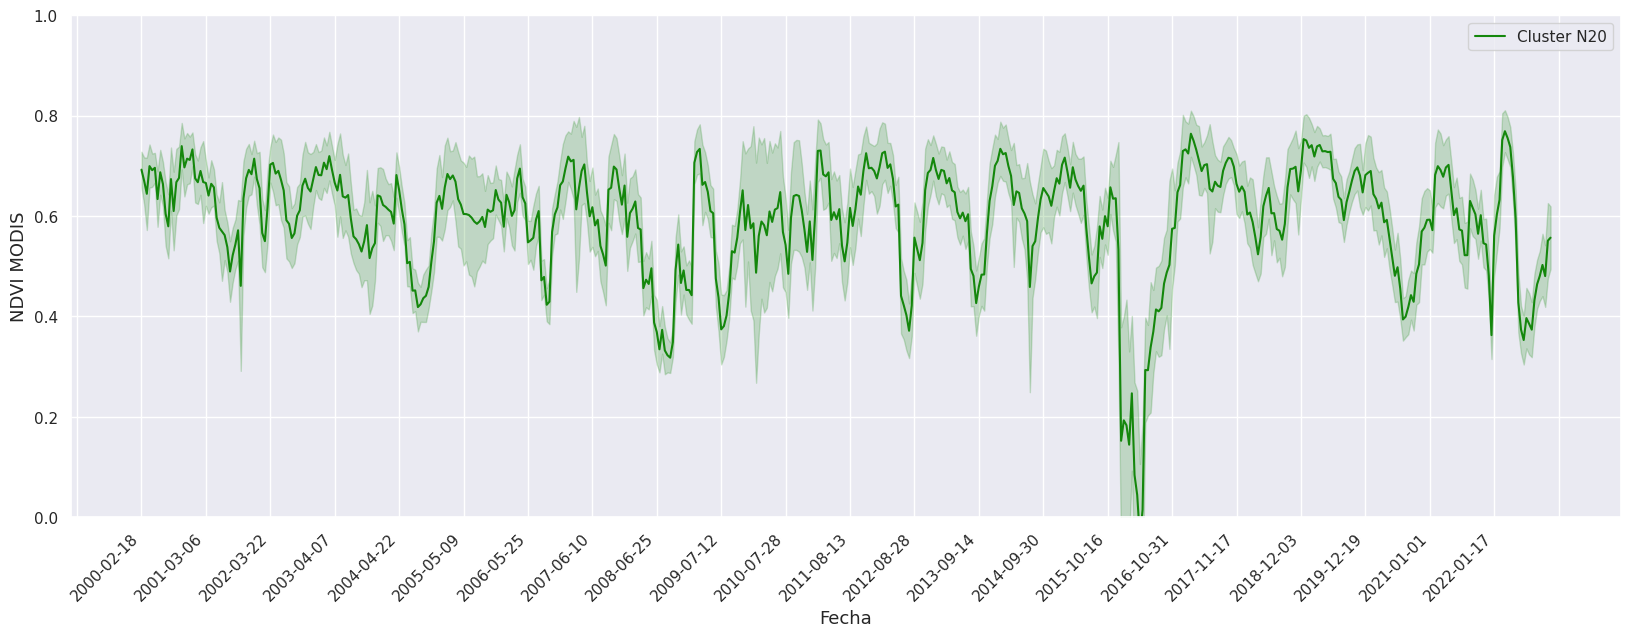

In [ ]:
Ncluster = 20

matrixClusterNDVI = dfNDVIsamples[dfNDVIsamples['cluster']==Ncluster].iloc[:, 3:].astype('float').to_numpy()

fig, axs = plt.subplots(figsize=(20, 6.52))#, sharex=True)

sns.set()
mean_1 = np.mean(matrixClusterNDVI, axis=0)/10000
std_1 = np.std(matrixClusterNDVI, axis=0)/10000

axs.plot(pdsFechas, mean_1, 'b-', label=f'Cluster N{Ncluster}', color='#14870c',)
axs.fill_between(pdsFechas, mean_1 - std_1, mean_1 + std_1, color='#14870c', alpha=0.2)

'''axs.axhline(y=8000, label='Max-Arroceras',color='red', linestyle='--')
axs.axhline(y=4730, label='Mean-Arroceras',color='black', linestyle='--')
axs.axhline(y=2000, label='Min-Arroceras',color='red', linestyle='--')'''

axs.xaxis.set_major_locator(plt.MultipleLocator(base=24))  # Adjust to desired frequency
axs.set_xticklabels(axs.get_xticklabels(), rotation=45, ha='right', fontsize=10)
axs.tick_params(axis='both', labelsize=11)

axs.set_ylabel('NDVI MODIS', fontsize=13)#'Burned area ['+r'$km^2$'+']', fontsize=15)
axs.set_xlabel('Fecha', fontsize=13)
axs.set_ylim(0,1)
axs.legend(loc='best')
plt.show()

<ipython-input-28-53ec5fbfb658>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(axs.get_xticklabels(), rotation=45, ha='right', fontsize=10)


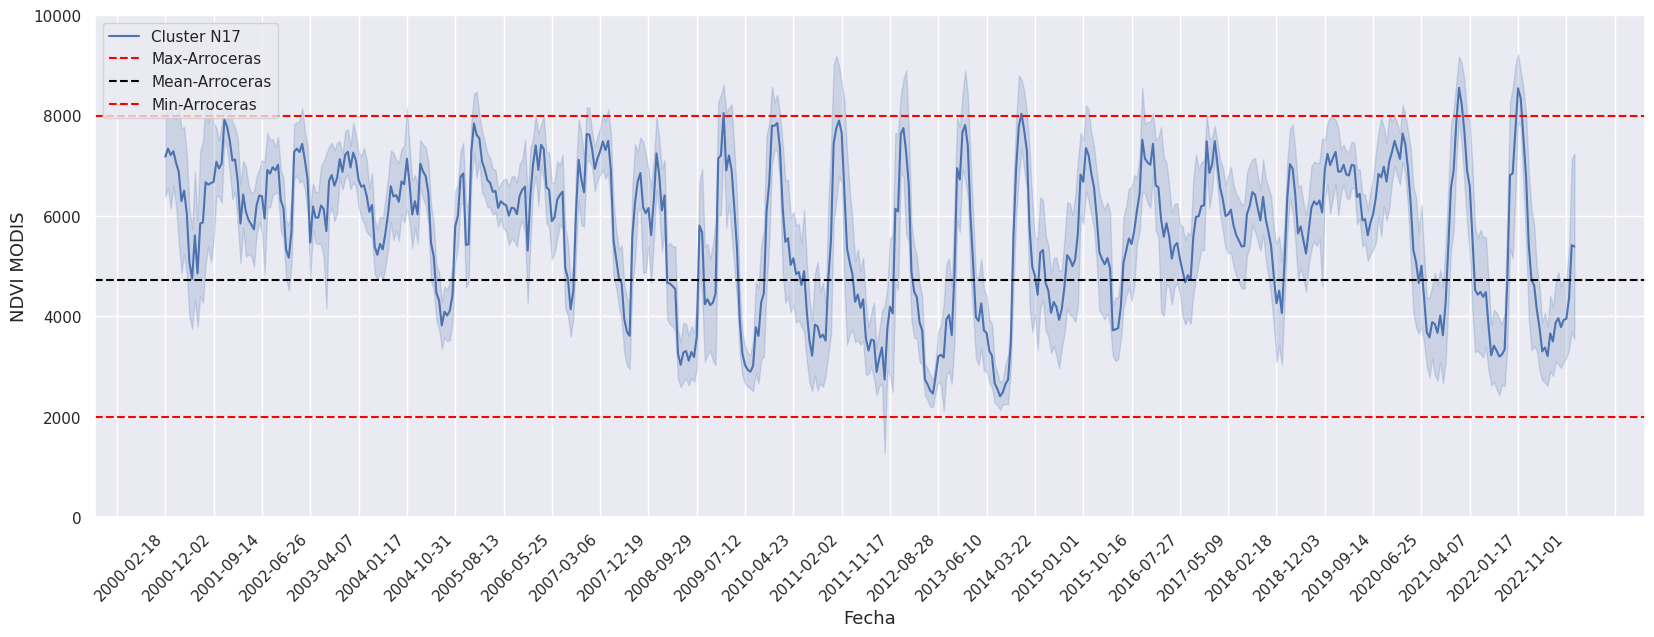

In [ ]:
Ncluster = 17
matrixClusterNDVI = dfNDVIsamples[dfNDVIsamples['cluster']==Ncluster].iloc[:, 3:].astype('float').to_numpy()

fig, axs = plt.subplots(figsize=(20, 6.52))#, sharex=True)

sns.set()
mean_1 = np.mean(matrixClusterNDVI, axis=0)
std_1 = np.std(matrixClusterNDVI, axis=0)

axs.plot(pdsFechas, mean_1, 'b-', label=f'Cluster N{Ncluster}')
axs.fill_between(pdsFechas, mean_1 - std_1, mean_1 + std_1, color='b', alpha=0.2)

axs.axhline(y=8000, label='Max-Arroceras',color='red', linestyle='--')
axs.axhline(y=4730, label='Mean-Arroceras',color='black', linestyle='--')
axs.axhline(y=2000, label='Min-Arroceras',color='red', linestyle='--')

axs.xaxis.set_major_locator(plt.MultipleLocator(base=18))  # Adjust to desired frequency
axs.set_xticklabels(axs.get_xticklabels(), rotation=45, ha='right', fontsize=10)
axs.tick_params(axis='both', labelsize=11)

axs.set_ylabel('NDVI MODIS', fontsize=13)#'Burned area ['+r'$km^2$'+']', fontsize=15)
axs.set_xlabel('Fecha', fontsize=13)
axs.set_ylim(0,10000)
axs.legend(loc='best')
plt.show()

### Gráficos analisis para definicion de min, mean y max para arroceras

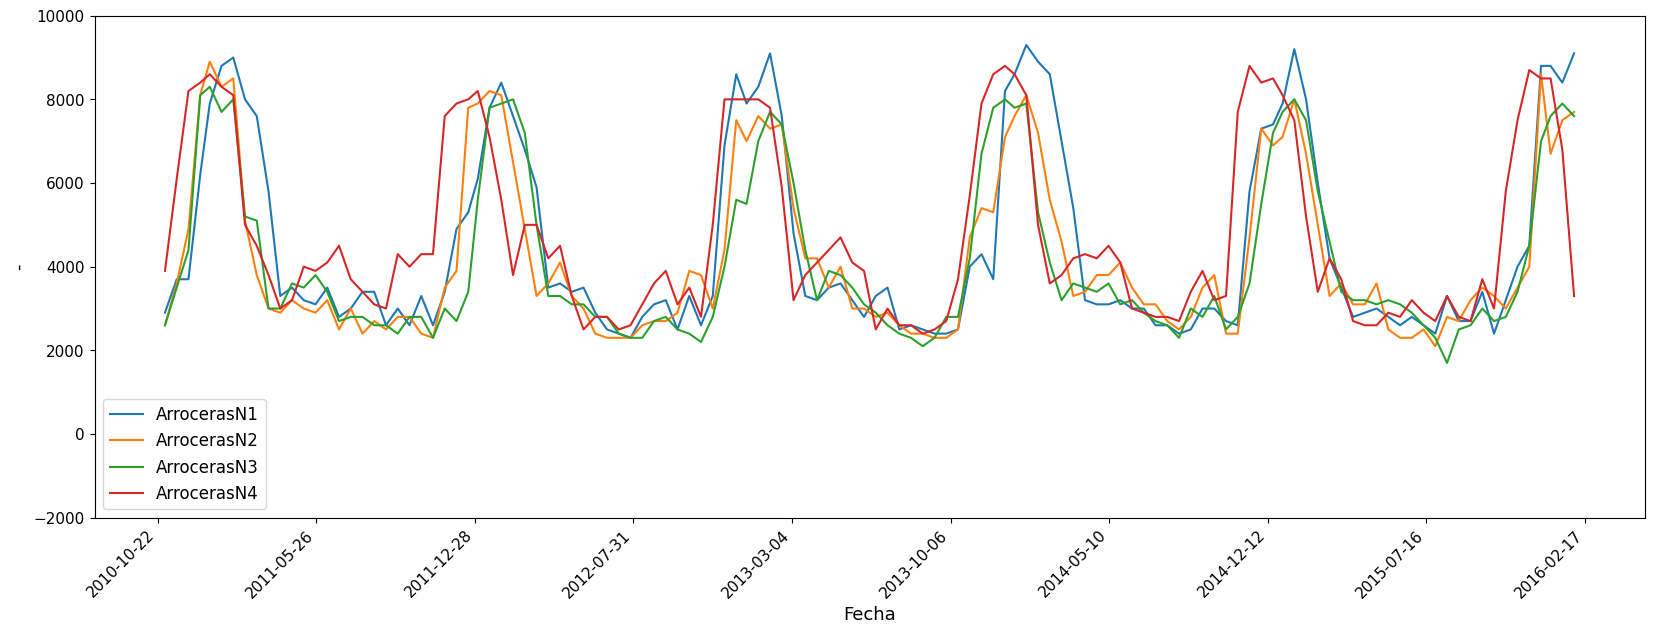

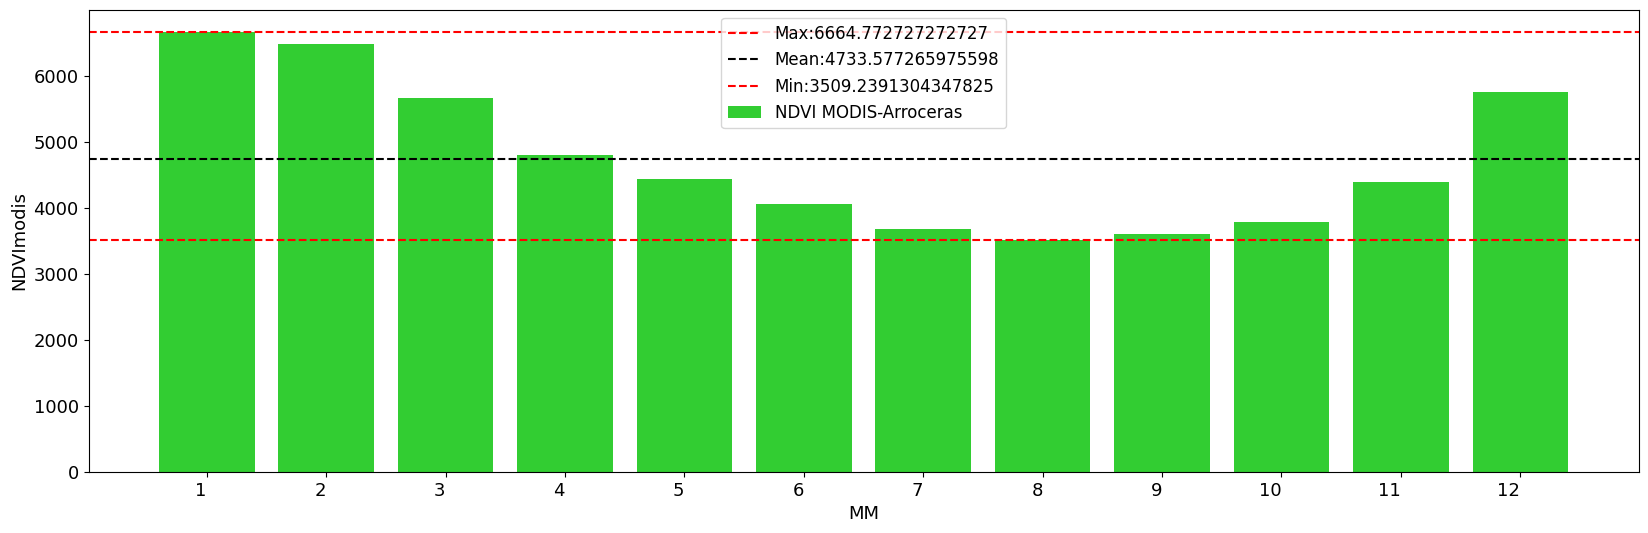